# Programming with contraints

Explain the problem as it is defined by the rules.

The engine will compute the combination that satisfies the constraines

- Ideation: 30mn
- Design: 1h - feature out how to manage variables for board
- Implementation: 2h - generic represeentatiàno of rules

In [ ]:
TODO

Have to deal with each variable
- generate names 
- or use range to name variable. Then rules are cryptic which is not the goal with this framework.


Will have to work on how to express the rules for split block. Need some extra rules like there must be a filler of size at least one between blocks

In [ ]:
## model documentation

https://pypi.org/project/python-constraint/

In [1]:
! pip install python-constraint

  Using cached python-constraint-1.4.0.tar.bz2 (18 kB)
  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2.py3-none-any.whl size=24081 sha256=96416a8f002cdf378faceb42bd25631aca654c5e2566c3158457715f981c71ed
  Stored in directory: /Users/cfalguiere/Library/Caches/pip/wheels/51/36/1f/c2ccb8dc4eba38c5215636d4ae2c480b32069cab0376bcc1a4
Successfully built python-constraint


In [118]:
from constraint  import *

## Basic example from the tutorial

In [4]:
problem = Problem()
problem.addVariable("a", [1,2,3])
problem.addVariable("b", [4,5,6])
problem.getSolutions()

[{'a': 3, 'b': 6},
 {'a': 3, 'b': 5},
 {'a': 3, 'b': 4},
 {'a': 2, 'b': 6},
 {'a': 2, 'b': 5},
 {'a': 2, 'b': 4},
 {'a': 1, 'b': 6},
 {'a': 1, 'b': 5},
 {'a': 1, 'b': 4}]

Without constraints it does a cartesian product

The constraint force to filter only paris where b is twice a 

In [6]:
problem.addConstraint(lambda a, b: a*2 == b,
                          ("a", "b"))
problem.getSolutions()

[{'a': 3, 'b': 6}, {'a': 2, 'b': 4}]

## apply to the mobnogram problem

In [119]:
# create the game engine
puzzle2x2 = Puzzle(clues2x2)
game2x2 = GameEngine(puzzle2x2, solution2x2)
board2x2 = game2x2.board

In [115]:
# let first write some static rules
problem = Problem()

# create a variable for each cell
# name is rNcM where N is the row number and M the col number
# are all in range 0-1
problem.addVariable("r0c0", [0,1])
problem.addVariable("r0c1", [0,1])
problem.addVariable("r1c0", [0,1])
problem.addVariable("r1c1", [0,1])
problem.getSolutions()

[{'r0c0': 1, 'r0c1': 1, 'r1c0': 1, 'r1c1': 1},
 {'r0c0': 1, 'r0c1': 1, 'r1c0': 1, 'r1c1': 0},
 {'r0c0': 1, 'r0c1': 1, 'r1c0': 0, 'r1c1': 1},
 {'r0c0': 1, 'r0c1': 1, 'r1c0': 0, 'r1c1': 0},
 {'r0c0': 1, 'r0c1': 0, 'r1c0': 1, 'r1c1': 1},
 {'r0c0': 1, 'r0c1': 0, 'r1c0': 1, 'r1c1': 0},
 {'r0c0': 1, 'r0c1': 0, 'r1c0': 0, 'r1c1': 1},
 {'r0c0': 1, 'r0c1': 0, 'r1c0': 0, 'r1c1': 0},
 {'r0c0': 0, 'r0c1': 1, 'r1c0': 1, 'r1c1': 1},
 {'r0c0': 0, 'r0c1': 1, 'r1c0': 1, 'r1c1': 0},
 {'r0c0': 0, 'r0c1': 1, 'r1c0': 0, 'r1c1': 1},
 {'r0c0': 0, 'r0c1': 1, 'r1c0': 0, 'r1c1': 0},
 {'r0c0': 0, 'r0c1': 0, 'r1c0': 1, 'r1c1': 1},
 {'r0c0': 0, 'r0c1': 0, 'r1c0': 1, 'r1c1': 0},
 {'r0c0': 0, 'r0c1': 0, 'r1c0': 0, 'r1c1': 1},
 {'r0c0': 0, 'r0c1': 0, 'r1c0': 0, 'r1c1': 0}]

In [116]:
# express the clues contraints in a static way
# last parameter is the given variables. They match the lambda vars.
# contraints on rows
problem.addConstraint(lambda c0, c1: c0+c1 == 1,
                          ("r0c0", "r0c1"))
problem.addConstraint(lambda c0, c1: c0+c1 == 2,
                          ("r1c0", "r1c1"))
# contraints on cols
problem.addConstraint(lambda r0, r1: r0+r1 == 2,
                          ("r0c0", "r1c0"))
problem.addConstraint(lambda r0, r1: r0+r1 == 1,
                          ("r0c1", "r1c1"))
solutions = problem.getSolutions()
solutions

[{'r0c0': 1, 'r0c1': 0, 'r1c0': 1, 'r1c1': 1}]

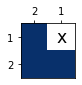

In [37]:
# mark expect an enum, thus set cell directly
board2x2.states[0,0] = solutions[0]['r0c0']
board2x2.states[0,1] = solutions[0]['r0c1']
board2x2.states[1,0] = solutions[0]['r1c0']
board2x2.states[1,1] = solutions[0]['r1c1']

game2x2.show_board()
game2x2.is_solved()


## A more generic implementation

In [38]:
clues2x2 = {
    'rows': [1, 2],
    'cols': [2, 1]
}
puzzle2x2 = Puzzle(clues2x2)

In [46]:
# let first write some static rules
problem = Problem()

# create a variable for each cell
# name is rNcM where N is the row number and M the col number
# are all in range 0-1
problem.addVariable("r0c0", [0,1])
problem.addVariable("r0c1", [0,1])
problem.addVariable("r1c0", [0,1])
problem.addVariable("r1c1", [0,1])
problem.getSolutions()

[{'r0c0': 1, 'r0c1': 1, 'r1c0': 1, 'r1c1': 1},
 {'r0c0': 1, 'r0c1': 1, 'r1c0': 1, 'r1c1': 0},
 {'r0c0': 1, 'r0c1': 1, 'r1c0': 0, 'r1c1': 1},
 {'r0c0': 1, 'r0c1': 1, 'r1c0': 0, 'r1c1': 0},
 {'r0c0': 1, 'r0c1': 0, 'r1c0': 1, 'r1c1': 1},
 {'r0c0': 1, 'r0c1': 0, 'r1c0': 1, 'r1c1': 0},
 {'r0c0': 1, 'r0c1': 0, 'r1c0': 0, 'r1c1': 1},
 {'r0c0': 1, 'r0c1': 0, 'r1c0': 0, 'r1c1': 0},
 {'r0c0': 0, 'r0c1': 1, 'r1c0': 1, 'r1c1': 1},
 {'r0c0': 0, 'r0c1': 1, 'r1c0': 1, 'r1c1': 0},
 {'r0c0': 0, 'r0c1': 1, 'r1c0': 0, 'r1c1': 1},
 {'r0c0': 0, 'r0c1': 1, 'r1c0': 0, 'r1c1': 0},
 {'r0c0': 0, 'r0c1': 0, 'r1c0': 1, 'r1c1': 1},
 {'r0c0': 0, 'r0c1': 0, 'r1c0': 1, 'r1c1': 0},
 {'r0c0': 0, 'r0c1': 0, 'r1c0': 0, 'r1c1': 1},
 {'r0c0': 0, 'r0c1': 0, 'r1c0': 0, 'r1c1': 0}]

In [47]:
# get the clues
clues_rows = puzzle2x2.norm_clues['rows']
clues_cols = puzzle2x2.norm_clues['cols']
print(clues_rows)
print(clues_cols)
# ox
# oo

[[1], [2]]
[[2], [1]]


In [44]:
clues_rows[0][0]

1

In [48]:
# express the clues contraints by the clues
# last parameter is the given variables. They match the lambda vars.
# contraints on rows
problem.addConstraint(lambda c0, c1: c0+c1 == clues_rows[0][0],
                          ("r0c0", "r0c1"))
problem.addConstraint(lambda c0, c1: c0+c1 == clues_rows[1][0],
                          ("r1c0", "r1c1"))
# constraints on cols
problem.addConstraint(lambda r0, r1: r0+r1 == clues_cols[0][0],
                          ("r0c0", "r1c0"))
problem.addConstraint(lambda r0, r1: r0+r1 == clues_cols[1][0],
                          ("r0c1", "r1c1"))
problem.getSolutions()

[{'r0c0': 1, 'r0c1': 0, 'r1c0': 1, 'r1c1': 1}]

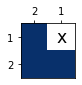

In [49]:
board2x2 = Board(puzzle2x2)
plotter2x2 = BoardPlotter(board2x2)

board2x2.states[0,0] = solutions[0]['r0c0']
board2x2.states[0,1] = solutions[0]['r0c1']
board2x2.states[1,0] = solutions[0]['r1c0']
board2x2.states[1,1] = solutions[0]['r1c1']

plotter2x2.show()
assert board2x2.is_done()

## Generic implementation for a fiven size

In [54]:
clues2x2 = {
    'rows': [1, 2],
    'cols': [2, 1]
}
puzzle2x2 = Puzzle(clues2x2)

In [55]:
# each variable is the position on the board reshaped to a list
problem = Problem()
# first parameter is the variable name
# second parameter is the range 0-1
problem.addVariables(range(puzzle2x2.cells_count), [0,1])
problem.getSolutions()

[{0: 1, 1: 1, 2: 1, 3: 1},
 {0: 1, 1: 1, 2: 1, 3: 0},
 {0: 1, 1: 1, 2: 0, 3: 1},
 {0: 1, 1: 1, 2: 0, 3: 0},
 {0: 1, 1: 0, 2: 1, 3: 1},
 {0: 1, 1: 0, 2: 1, 3: 0},
 {0: 1, 1: 0, 2: 0, 3: 1},
 {0: 1, 1: 0, 2: 0, 3: 0},
 {0: 0, 1: 1, 2: 1, 3: 1},
 {0: 0, 1: 1, 2: 1, 3: 0},
 {0: 0, 1: 1, 2: 0, 3: 1},
 {0: 0, 1: 1, 2: 0, 3: 0},
 {0: 0, 1: 0, 2: 1, 3: 1},
 {0: 0, 1: 0, 2: 1, 3: 0},
 {0: 0, 1: 0, 2: 0, 3: 1},
 {0: 0, 1: 0, 2: 0, 3: 0}]

In [56]:
# get the clues
clues_rows = puzzle2x2.norm_clues['rows']
clues_cols = puzzle2x2.norm_clues['cols']
nc = puzzle2x2.width
nr = puzzle2x2.height

In [ ]:
# {0: 1, 1: 0, 2: 1, 3: 1}
# -> {'r0c0': 1, 'r0c1': 0, 'r1c0': 1, 'r1c1': 1}

In [51]:
# cells for row 0 are at position row * 2 + col where 2 stands for the width
# 0 * 2 + 0 -> 0
# 0 * 2 + 1 -> 1
[0 * 2 + c for c in range(2)]

[0, 1]

In [52]:
# cells for col 0 are at position row + 2 * col where 2 stands for the width
# 0 * 2 + 0 -> 0
# 1 * 2 + 0 -> 2
[r * 2 + 0 for r in range(2)]

[0, 2]

In [58]:
# express the clues contraints by the clues
# last parameter is the collection of variable names that must add up 
# please note that the list consist in var names not values
# to the value given as parameter to ExactSumConstraint.
# contraints on rows
problem.addConstraint(
         ExactSumConstraint(clues_rows[0][0]),
         [0 * 2 + c for c in range(nc)])
problem.addConstraint(
         ExactSumConstraint(clues_rows[1][0]),
         [1 * 2 + c for c in range(nc)])
# contraints on cols
problem.addConstraint(
     ExactSumConstraint(clues_cols[0][0]),
     [r * 2 + 0 for r in range(nr)])
problem.addConstraint(
     ExactSumConstraint(clues_cols[1][0]),
     [r * 2 + 1 for r in range(nr)])
solutions = problem.getSolutions()
solutions

[{0: 1, 1: 0, 2: 1, 3: 1}]

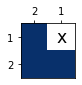

In [59]:
board2x2 = Board(puzzle2x2)
plotter2x2 = BoardPlotter(board2x2)

board2x2.states[0,0] = solutions[0][0]
board2x2.states[0,1] = solutions[0][1]
board2x2.states[1,0] = solutions[0][2]
board2x2.states[1,1] = solutions[0][3]

plotter2x2.show()
assert board2x2.is_done()

## Generic implementation

In [104]:
clues2x2 = {
    'rows': [1, 2],
    'cols': [2, 1]
}
puzzle2x2 = Puzzle(clues2x2)

In [105]:
# each variable is the position on the board reshaped to a list
problem = Problem()
# first parameter is the variable name
# second parameter is the range 0-1
problem.addVariables(range(puzzle2x2.cells_count), [0,1])
problem.getSolutions()

[{0: 1, 1: 1, 2: 1, 3: 1},
 {0: 1, 1: 1, 2: 1, 3: 0},
 {0: 1, 1: 1, 2: 0, 3: 1},
 {0: 1, 1: 1, 2: 0, 3: 0},
 {0: 1, 1: 0, 2: 1, 3: 1},
 {0: 1, 1: 0, 2: 1, 3: 0},
 {0: 1, 1: 0, 2: 0, 3: 1},
 {0: 1, 1: 0, 2: 0, 3: 0},
 {0: 0, 1: 1, 2: 1, 3: 1},
 {0: 0, 1: 1, 2: 1, 3: 0},
 {0: 0, 1: 1, 2: 0, 3: 1},
 {0: 0, 1: 1, 2: 0, 3: 0},
 {0: 0, 1: 0, 2: 1, 3: 1},
 {0: 0, 1: 0, 2: 1, 3: 0},
 {0: 0, 1: 0, 2: 0, 3: 1},
 {0: 0, 1: 0, 2: 0, 3: 0}]

In [106]:
# get the clues
clues_rows = puzzle2x2.norm_clues['rows']
clues_cols = puzzle2x2.norm_clues['cols']
nc = puzzle2x2.width
nr = puzzle2x2.height

In [69]:
clues_rows[0]

[1]

In [107]:
for row in range(nr):
    problem.addConstraint(
             ExactSumConstraint(clues_rows[row][0]),
             [row * nc + c for c in range(nc)])
for col in range(nc):
    problem.addConstraint(
         ExactSumConstraint(clues_cols[col][0]),
         [r * nc + col for r in range(nr)])

solutions = problem.getSolutions()
solutions

[{0: 1, 1: 0, 2: 1, 3: 1}]

In [84]:
list(solutions[0].values())

[1, 0, 1, 1]

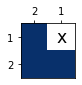

In [108]:
board2x2 = Board(puzzle2x2)
plotter2x2 = BoardPlotter(board2x2)

board2x2.states.flat[:] = list(solutions[0].values())
plotter2x2.show()
assert board2x2.is_done()

## Solver class

In [109]:
%reset -f

In [110]:
from boardutilsv2 import Puzzle, Board, BoardMark
from plotterutilsv2 import BoardPlotter

from constraint  import *

class SolverConstraints:
    
    def solve(self, some_puzzle, verbose=False):
        # each variable is the position on the board reshaped to a list
        problem = Problem()
        # first parameter is the variable name
        # second parameter is the range 0-1
        problem.addVariables(range(some_puzzle.cells_count), [0,1])

        # get the clues
        clues_rows = some_puzzle.norm_clues['rows']
        clues_cols = some_puzzle.norm_clues['cols']
        nc = some_puzzle.width
        nr = some_puzzle.height

        for row in range(nr):
            problem.addConstraint(
                     ExactSumConstraint(clues_rows[row][0]),
                     [row * nc + c for c in range(nc)])
        for col in range(nc):
            problem.addConstraint(
                 ExactSumConstraint(clues_cols[col][0]),
                 [r * nc + col for r in range(nr)])

        solutions = problem.getSolutions()
        if verbose:
            print(f"solutions={solutions}")

        board = Board(some_puzzle)
        board.states.flat[:] = list(solutions[0].values())
        return board

### test 2x2

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
solutions=[{0: 1, 1: 0, 2: 1, 3: 1}]


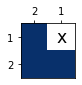

In [111]:
%time
# ox
# oo
clues2x2 = {
    'rows': [1, 2],
    'cols': [2, 1]
}
puzzle2x2 = Puzzle(clues2x2)
board2x2_solved = SolverConstraints().solve(puzzle2x2, verbose=True)
plotter2x2 = BoardPlotter(board2x2_solved)
plotter2x2.show()
assert board2x2_solved.is_done()

### test a 3x3

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
solutions=[{0: 1, 1: 0, 2: 0, 3: 1, 4: 1, 5: 0, 6: 1, 7: 1, 8: 1}]


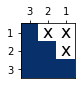

In [112]:
%time
# oxx
# oox
# ooo
clues3x3 = {
    'rows': [1, 2, 3],
    'cols': [3, 2, 1]
}
puzzle3x3 = Puzzle(clues3x3)

board3x3_solved = SolverConstraints().solve(puzzle3x3, verbose=True)
plotter3x3 = BoardPlotter(board3x3_solved)
plotter3x3.show()
assert board3x3_solved.is_done()

# split blocks

In [ ]:
Different approach

In [191]:
# ox
# oo
clues2x2 = {
    'rows': [1, 2],
    'cols': [2, 1]
}
puzzle2x2 = Puzzle(clues2x2)

In [192]:
# get the clues
clues_rows = puzzle2x2.norm_clues['rows']
clues_cols = puzzle2x2.norm_clues['cols']
nc = puzzle2x2.width
nr = puzzle2x2.height

In [193]:
# let first write some static rules
problem = Problem()

problem.addVariable("r0f0", [0,nc-1])
problem.addVariable("r0b0", [1])
problem.addVariable("r0f1", [0,nc-1])

problem.addVariable("r1f0", [0,nc-2])
problem.addVariable("r1b0", [2])
problem.addVariable("r1f1", [0,nc-2])

problem.addVariable("c0f0", [0,nr-2])
problem.addVariable("c0b0", [2])
problem.addVariable("c0f1", [0,nr-2])

problem.addVariable("c1f0", [0,nr-1])
problem.addVariable("c1b0", [1])
problem.addVariable("c1f1", [0,nr-1])

#problem.getSolutions()

In [194]:
problem.addConstraint(
                     ExactSumConstraint(nc),
                     ["r0f0", "r0b0", "r0f1"])

problem.addConstraint(
                     ExactSumConstraint(nc),
                     ["r1f0", "r1b0", "r1f1"])

problem.addConstraint(
                     ExactSumConstraint(nr),
                     ["c0f0", "c0b0", "c0f1"])

problem.addConstraint(
                     ExactSumConstraint(nr),
                     ["c1f0", "c1b0", "c1f1"])


In [195]:
solutions = problem.getSolutions()

In [196]:
set([s['c1f0'] for s in solutions])

{0, 1}

In [197]:
set([s['c1f1'] for s in solutions])

{0, 1}

In [198]:
problem.addVariable("r0c0", [0,1])
problem.addVariable("r0c1", [0,1])
problem.addVariable("r1c0", [0,1])
problem.addVariable("r1c1", [0,1])

In [199]:
problem.addConstraint(
     ExactSumConstraint(clues_rows[0][0]),
     ["r0c0", "r0c1"])
problem.addConstraint(
     ExactSumConstraint(clues_rows[1][0]),
     ["r1c0", "r1c1"])

problem.addConstraint(
     ExactSumConstraint(clues_cols[0][0]),
     ["r0c0", "r1c0"])
problem.addConstraint(
     ExactSumConstraint(clues_cols[1][0]),
     ["r0c1", "r1c1"])


In [200]:
solutions = problem.getSolutions()
solutions

[{'r0c0': 1,
  'r0c1': 0,
  'r1c0': 1,
  'r1c1': 1,
  'c0b0': 2,
  'c1b0': 1,
  'r0b0': 1,
  'r1b0': 2,
  'c0f0': 0,
  'c0f1': 0,
  'c1f0': 1,
  'c1f1': 0,
  'r0f0': 1,
  'r0f1': 0,
  'r1f0': 0,
  'r1f1': 0},
 {'r0c0': 1,
  'r0c1': 0,
  'r1c0': 1,
  'r1c1': 1,
  'c0b0': 2,
  'c1b0': 1,
  'r0b0': 1,
  'r1b0': 2,
  'c0f0': 0,
  'c0f1': 0,
  'c1f0': 1,
  'c1f1': 0,
  'r0f0': 1,
  'r0f1': 0,
  'r1f0': 0,
  'r1f1': 0},
 {'r0c0': 1,
  'r0c1': 0,
  'r1c0': 1,
  'r1c1': 1,
  'c0b0': 2,
  'c1b0': 1,
  'r0b0': 1,
  'r1b0': 2,
  'c0f0': 0,
  'c0f1': 0,
  'c1f0': 1,
  'c1f1': 0,
  'r0f0': 1,
  'r0f1': 0,
  'r1f0': 0,
  'r1f1': 0},
 {'r0c0': 1,
  'r0c1': 0,
  'r1c0': 1,
  'r1c1': 1,
  'c0b0': 2,
  'c1b0': 1,
  'r0b0': 1,
  'r1b0': 2,
  'c0f0': 0,
  'c0f1': 0,
  'c1f0': 1,
  'c1f1': 0,
  'r0f0': 1,
  'r0f1': 0,
  'r1f0': 0,
  'r1f1': 0},
 {'r0c0': 1,
  'r0c1': 0,
  'r1c0': 1,
  'r1c1': 1,
  'c0b0': 2,
  'c1b0': 1,
  'r0b0': 1,
  'r1b0': 2,
  'c0f0': 0,
  'c0f1': 0,
  'c1f0': 1,
  'c1f1': 0,
  'r0f0'

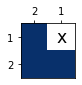

In [153]:
board2x2 = Board(puzzle2x2)
plotter2x2 = BoardPlotter(board2x2)

board2x2.states[0,0] = solutions[0]['r0c0']
board2x2.states[0,1] = solutions[0]['r0c1']
board2x2.states[1,0] = solutions[0]['r1c0']
board2x2.states[1,1] = solutions[0]['r1c1']

plotter2x2.show()
assert board2x2.is_done()

# RE

In [224]:
# ox
# oo
clues2x2 = {
    'rows': [1, 2],
    'cols': [2, 1]
}
puzzle2x2 = Puzzle(clues2x2)

In [225]:
# get the clues
clues_rows = puzzle2x2.norm_clues['rows']
clues_cols = puzzle2x2.norm_clues['cols']
nc = puzzle2x2.width
nr = puzzle2x2.height

In [226]:
problem = Problem()

In [227]:
problem.addVariable("r0c0", [0,1])
problem.addVariable("r0c1", [0,1])
problem.addVariable("r1c0", [0,1])
problem.addVariable("r1c1", [0,1])

In [228]:
problem.addConstraint(
     ExactSumConstraint(clues_rows[0][0]),
     ["r0c0", "r0c1"])
problem.addConstraint(
     ExactSumConstraint(clues_rows[1][0]),
     ["r1c0", "r1c1"])

problem.addConstraint(
     ExactSumConstraint(clues_cols[0][0]),
     ["r0c0", "r1c0"])
problem.addConstraint(
     ExactSumConstraint(clues_cols[1][0]),
     ["r0c1", "r1c1"])


In [229]:
solutions = problem.getSolutions()
solutions

[{'r0c0': 1, 'r0c1': 0, 'r1c0': 1, 'r1c1': 1}]

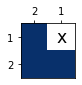

In [230]:
board2x2 = Board(puzzle2x2)
plotter2x2 = BoardPlotter(board2x2)

board2x2.states[0,0] = solutions[0]['r0c0']
board2x2.states[0,1] = solutions[0]['r0c1']
board2x2.states[1,0] = solutions[0]['r1c0']
board2x2.states[1,1] = solutions[0]['r1c1']

plotter2x2.show()
assert board2x2.is_done()

## update the board for any dimension

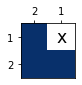

In [231]:
board2x2 = Board(puzzle2x2)
plotter2x2 = BoardPlotter(board2x2)

board2x2.states.flat[:] = list(solutions[0].values())

plotter2x2.show()
assert board2x2.is_done()

## create variables and constraints for any dimension

In [232]:
problem = Problem()

In [210]:
[f"r{r:02d}c{c:02d}" for c in range(2) for r in range(2)]

['r00c00', 'r01c00', 'r00c01', 'r01c01']

In [233]:
var_names = [f"r{r:02d}c{c:02d}" for c in range(2) for r in range(2)]
for name in var_names:
    problem.addVariable(name, [0,1])

In [220]:
# all cells of a row add up to the clue for the row
# all var for row 0
from re import match
[name for name in var_names if "r00" in name]

['r00c00', 'r00c01']

In [234]:
# all cells of a row add up to the clue for the row
# the clus is expressed as a list of one integer
for r in range(nr):
    problem.addConstraint(
         ExactSumConstraint(clues_rows[r][0]),
         [name for name in var_names if f"r{r:02d}" in name])

# all cells of a col add up to the clue for the col
# the clus is expressed as a list of one integer
for c in range(nc):
    problem.addConstraint(
         ExactSumConstraint(clues_cols[c][0]),
         [name for name in var_names if f"c{c:02d}" in name])


In [235]:
solutions = problem.getSolutions()
solutions

[{'r00c00': 1, 'r00c01': 0, 'r01c00': 1, 'r01c01': 1}]

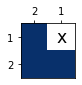

In [236]:
board2x2 = Board(puzzle2x2)
plotter2x2 = BoardPlotter(board2x2)

board2x2.states.flat[:] = list(solutions[0].values())

plotter2x2.show()
assert board2x2.is_done()

# class 

In [ ]:
%reste -f 

In [258]:
from boardutilsv2 import Puzzle, Board, BoardMark
from plotterutilsv2 import BoardPlotter

from constraint  import *

#TOdo refine as Problem subclass and Solver

class SolverConstraints:
    
    def solve(self, some_puzzle, verbose=False):
        # each variable is the position on the board reshaped to a list
        problem = Problem()
        # first parameter is the variable name
        # second parameter is the range 0-1
        problem.addVariables(range(some_puzzle.cells_count), [0,1])

        # get the clues
        clues_rows = some_puzzle.norm_clues['rows']
        clues_cols = some_puzzle.norm_clues['cols']
        nc = some_puzzle.width
        nr = some_puzzle.height

        # create a variable for each cell
        # name are rNNcMM where NN stand for row number and MM stand for col number
        var_names = [f"r{r:02d}c{c:02d}" 
                     for c in range(nc) 
                     for r in range(nr)]
        if verbose:
            print(f"var_names={var_names}")
        for name in var_names:
            problem.addVariable(name, [0,1])

        # all cells of a row add up to the clue for the row
        # the clus is expressed as a list of one integer
        for r in range(nr):
            problem.addConstraint(
                 ExactSumConstraint(clues_rows[r][0]),
                 [name for name in var_names if f"r{r:02d}" in name])

        # all cells of a col add up to the clue for the col
        # the clus is expressed as a list of one integer
        for c in range(nc):
            problem.addConstraint(
                 ExactSumConstraint(clues_cols[c][0]),
                 [name for name in var_names if f"c{c:02d}" in name])


        solutions = problem.getSolutions()
        if verbose:
            print(f"solutions={solutions}")

        board = None
        if solutions:
            board = Board(some_puzzle)
            board.states.flat[:] = list(solutions[0].values())
        return board

## tests

In [264]:
# ox
# oo
clues2x2 = {
    'rows': [1, 2],
    'cols': [2, 1]
}
puzzle2x2 = Puzzle(clues2x2)

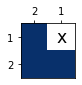

In [265]:
board2x2_solved = SolverConstraints().solve(puzzle2x2)
plotter2x2 = BoardPlotter(board2x2_solved)
plotter2x2.show()
assert board2x2_solved.is_done()

In [266]:
# oxx
# oox
# ooo
clues3x3 = {
    'rows': [1, 2, 3],
    'cols': [3, 2, 1]
}
puzzle3x3 = Puzzle(clues3x3)

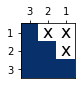

In [267]:
board3x3_solved = SolverConstraints().solve(puzzle3x3)
if board3x3_solved:
    plotter3x3 = BoardPlotter(board3x3_solved)
    plotter3x3.show()
    assert board3x3_solved.is_done()

# split

Try to predict chunks

In [329]:
# oxo
# xox
# xox
clues3x3s = {
    'rows': [[1,1], 1, 1],
    'cols': [1, 2, 1]
}
puzzle3x3s = Puzzle(clues3x3s)

In [330]:
# get the clues
clues_rows = puzzle3x3s.norm_clues['rows']
clues_cols = puzzle3x3s.norm_clues['cols']
nc = puzzle3x3s.width
nr = puzzle3x3s.height

In [331]:
problem = Problem()

In [273]:
range(1, nc)

range(1, 3)

In [332]:
problem.addVariable("r0s0", range(clues_rows[0][0], nc))
problem.addVariable("r0s0-1", range(1, nc))
problem.addVariable("r0s1", range(clues_rows[0][1], nc))

In [283]:
#problem.getSolutions()

In [333]:
problem.addConstraint(
                     ExactSumConstraint(nc),
                     ["r0s0", "r0s0-1", "r0s1"])


In [334]:
solutions = problem.getSolutions()
solutions

[{'r0s0': 1, 'r0s0-1': 1, 'r0s1': 1}]

In [350]:
# oooxxoooxo
# 3 slices 0-1-2, 5-6-7, 9
solutions_sorted = [{'r0s0': 3, 'r0s0-1': 2, 'r0s1': 3, 'r0s1-2': 1, 'r0s2': 1}]

In [352]:
solutions_sorted[0]

{'r0s0': 3, 'r0s0-1': 2, 'r0s1': 3, 'r0s1-2': 1, 'r0s2': 1}

In [360]:
slices = [v for (k,v) in solutions_sorted[0].items()]
slices

[3, 2, 3, 1, 1]

In [371]:
slices_cum = [sum(slices[0:i]) for i in range (len(slices))] + [10]
slices_cum

[0, 3, 5, 8, 9, 10]

In [372]:
[range(slices_cum[i],slices_cum[i+1]) for i in range(0, len(slices_cum), 2)]

[range(0, 3), range(5, 8), range(9, 10)]

In [391]:
def convert_to_ranges(solution_sorted):
    # get each slice of the soluton (dict values)
    slices = [v for (k,v) in solution_sorted.items()]
    # accumulate slices to get start and end of ranges
    slices_cum = [sum(slices[0:i]) for i in range (len(slices))] + [10]
    ranges = [range(slices_cum[i],slices_cum[i+1]) for i in range(0, len(slices_cum), 2)]
    return ranges

In [374]:
convert_to_ranges(solutions_sorted[0])

[range(0, 3), range(5, 8), range(9, 10)]

## test 5x5

In [375]:
clues5x5s = {
    'rows': [1, 3, [1,1], 3, 5],
    'cols': [1, 4, [2,2], 4, 1]
}
puzzle5x5s = Puzzle(clues5x5s)

In [376]:
# get the clues
clues_rows = puzzle5x5s.norm_clues['rows']
clues_cols = puzzle5x5s.norm_clues['cols']
nc = puzzle5x5s.width
nr = puzzle5x5s.height

In [380]:
problem = Problem()

In [381]:
problem.addVariable("r2s0", range(clues_rows[2][0], nc))
problem.addVariable("r2s0-1", range(1, nc))
problem.addVariable("r2s1", range(clues_rows[2][1], nc))

problem.addVariable("c2s0", range(clues_cols[2][0], nr))
problem.addVariable("c2s0-1", range(1, nc))
problem.addVariable("c2s1", range(clues_cols[2][1], nr))

In [382]:
problem.addConstraint(
                     ExactSumConstraint(nc),
                     ["r2s0", "r2s0-1", "r2s1"])

problem.addConstraint(
                     ExactSumConstraint(nr),
                     ["c2s0", "c2s0-1", "c2s1"])


In [383]:
solutions = problem.getSolutions()
solutions_sorted = [sorted(s.items()) for s in solutions]

In [392]:
solutions

[{'c2s0': 2, 'c2s1': 2, 'c2s0-1': 1, 'r2s0': 3, 'r2s0-1': 1, 'r2s1': 1},
 {'c2s0': 2, 'c2s1': 2, 'c2s0-1': 1, 'r2s0': 2, 'r2s0-1': 2, 'r2s1': 1},
 {'c2s0': 2, 'c2s1': 2, 'c2s0-1': 1, 'r2s0': 2, 'r2s0-1': 1, 'r2s1': 2},
 {'c2s0': 2, 'c2s1': 2, 'c2s0-1': 1, 'r2s0': 1, 'r2s0-1': 3, 'r2s1': 1},
 {'c2s0': 2, 'c2s1': 2, 'c2s0-1': 1, 'r2s0': 1, 'r2s0-1': 2, 'r2s1': 2},
 {'c2s0': 2, 'c2s1': 2, 'c2s0-1': 1, 'r2s0': 1, 'r2s0-1': 1, 'r2s1': 3}]

# RE

In [407]:
clues5x5s = {
    'rows': [1, 3, [1,1], 3, 5],
    'cols': [1, 4, [2,2], 4, 1]
}
puzzle5x5s = Puzzle(clues5x5s)

In [408]:
# get the clues
clues_rows = puzzle5x5s.norm_clues['rows']
clues_cols = puzzle5x5s.norm_clues['cols']
nc = puzzle5x5s.width
nr = puzzle5x5s.height

In [409]:
problem = Problem()

In [410]:
# create a variable for each cell
# name are rNNcMM where NN stand for row number and MM stand for col number
var_names = [f"r{r:02d}c{c:02d}" for c in range(nc) for r in range(nr)]
for name in var_names:
    problem.addVariable(name, [0,1])

In [411]:
# all cells of a row add up to the clue for the row
# the clus is expressed as a list of one integer
for r in range(nr):
    target = clues_rows[r][0]
    if len(clues_rows[r]) > 1:
        # split blocks: all the cells of the row sum up to the sum of clues
        target = sum(clues_rows[r])
    
    problem.addConstraint(
         ExactSumConstraint(target),
         [name for name in var_names if f"r{r:02d}" in name])
    

# all cells of a col add up to the clue for the col
# the clus is expressed as a list of one integer
for c in range(nc):
    target = clues_cols[c][0]
    if len(clues_cols[c]) > 1:
        # split blocks: all the cells of the col sum up to the sum of clues
        target = sum(clues_cols[c])

    problem.addConstraint(
         ExactSumConstraint(target),
         [name for name in var_names if f"c{c:02d}" in name])


In [412]:
solutions = problem.getSolutions()
solutions

[{'r00c00': 0,
  'r00c01': 1,
  'r00c02': 0,
  'r00c03': 0,
  'r00c04': 0,
  'r01c00': 0,
  'r01c01': 1,
  'r01c02': 1,
  'r01c03': 1,
  'r01c04': 0,
  'r02c00': 0,
  'r02c01': 0,
  'r02c02': 1,
  'r02c03': 1,
  'r02c04': 0,
  'r03c00': 0,
  'r03c01': 1,
  'r03c02': 1,
  'r03c03': 1,
  'r03c04': 0,
  'r04c00': 1,
  'r04c01': 1,
  'r04c02': 1,
  'r04c03': 1,
  'r04c04': 1},
 {'r00c00': 0,
  'r00c01': 0,
  'r00c02': 1,
  'r00c03': 0,
  'r00c04': 0,
  'r01c00': 0,
  'r01c01': 1,
  'r01c02': 1,
  'r01c03': 1,
  'r01c04': 0,
  'r02c00': 0,
  'r02c01': 1,
  'r02c02': 0,
  'r02c03': 1,
  'r02c04': 0,
  'r03c00': 0,
  'r03c01': 1,
  'r03c02': 1,
  'r03c03': 1,
  'r03c04': 0,
  'r04c00': 1,
  'r04c01': 1,
  'r04c02': 1,
  'r04c03': 1,
  'r04c04': 1},
 {'r00c00': 0,
  'r00c01': 0,
  'r00c02': 0,
  'r00c03': 1,
  'r00c04': 0,
  'r01c00': 0,
  'r01c01': 1,
  'r01c02': 1,
  'r01c03': 1,
  'r01c04': 0,
  'r02c00': 0,
  'r02c01': 1,
  'r02c02': 1,
  'r02c03': 0,
  'r02c04': 0,
  'r03c00': 0,
  'r03c0

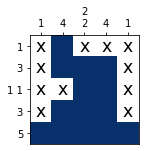

valid=False


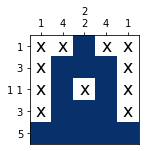

valid=True


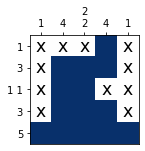

valid=False


In [414]:
for solution in solutions:
    board5x5s = Board(puzzle5x5s)
    plotter5x5s = BoardPlotter(board5x5s)

    board5x5s.states.flat[:] = list(solution.values())
    
    plotter5x5s.show()
    
    print(f"valid={board5x5s.is_done()}") 

It generates invalid blocks because it is missing a rule that forces the blocks to be separated. For instance col 2.

When the clue has multiple split blocks, there must be at least 1 filler.

Let us say I know the filler is at row 2, col 2 in the center of the board.

In [455]:
clues5x5s = {
    'rows': [1, 3, [1,1], 3, 5],
    'cols': [1, 4, [2,2], 4, 1]
}
puzzle5x5s = Puzzle(clues5x5s)

In [456]:
# get the clues
clues_rows = puzzle5x5s.norm_clues['rows']
clues_cols = puzzle5x5s.norm_clues['cols']
nc = puzzle5x5s.width
nr = puzzle5x5s.height

In [457]:
problem = Problem()

In [458]:
# create a variable for each cell
# name are rNNcMM where NN stand for row number and MM stand for col number
var_names = [f"r{r:02d}c{c:02d}" for c in range(nc) for r in range(nr)]
for name in var_names:
    problem.addVariable(name, [0,1])

In [459]:
# all cells of a row add up to the clue for the row
# the clus is expressed as a list of one integer
for r in range(nr):
    target = clues_rows[r][0]
    if len(clues_rows[r]) > 1:
        # split blocks: all the cells of the row sum up to the sum of clues
        target = sum(clues_rows[r])
        
        # ad-hoc split in 2 chunks
        problem.addConstraint(
             ExactSumConstraint(clues_rows[r][0]),
             [f"r{r:02d}c{c:02d}" for c in range(0,2)]) # r02c00 and r02c01
        problem.addConstraint(
             ExactSumConstraint(clues_rows[r][1]),
             [f"r{r:02d}c{c:02d}" for c in range(3,5)]) # r02c03 and r02c04

    
    problem.addConstraint(
         ExactSumConstraint(target),
         [name for name in var_names if f"r{r:02d}" in name])
    

# all cells of a col add up to the clue for the col
# the clus is expressed as a list of one integer
for c in range(nc):
    target = clues_cols[c][0]
    if len(clues_cols[c]) > 1:
        # split blocks: all the cells of the col sum up to the sum of clues
        target = sum(clues_cols[c])

        # ad-hoc split in 2 chunks
        problem.addConstraint(
             ExactSumConstraint(clues_cols[c][0]),
             [f"r{r:02d}c{c:02d}" for r in range(0,2)]) # r00c02 and r01c02
        problem.addConstraint(
             ExactSumConstraint(clues_cols[c][1]),
             [f"r{r:02d}c{c:02d}" for r in range(3,5)]) # r03c02 and r04c02

    problem.addConstraint(
         ExactSumConstraint(target),
         [name for name in var_names if f"c{c:02d}" in name])


In [460]:
solutions = problem.getSolutions()
solutions

[{'r00c02': 1,
  'r01c02': 1,
  'r02c00': 0,
  'r02c01': 1,
  'r02c03': 1,
  'r02c04': 0,
  'r03c02': 1,
  'r04c02': 1,
  'r00c00': 0,
  'r00c01': 0,
  'r00c03': 0,
  'r00c04': 0,
  'r02c02': 0,
  'r01c00': 0,
  'r01c01': 1,
  'r01c03': 1,
  'r01c04': 0,
  'r03c00': 0,
  'r03c01': 1,
  'r03c03': 1,
  'r03c04': 0,
  'r04c00': 1,
  'r04c01': 1,
  'r04c03': 1,
  'r04c04': 1}]

In [461]:
solution_sorted = sorted(solutions[0].items())
solution_sorted

[('r00c00', 0),
 ('r00c01', 0),
 ('r00c02', 1),
 ('r00c03', 0),
 ('r00c04', 0),
 ('r01c00', 0),
 ('r01c01', 1),
 ('r01c02', 1),
 ('r01c03', 1),
 ('r01c04', 0),
 ('r02c00', 0),
 ('r02c01', 1),
 ('r02c02', 0),
 ('r02c03', 1),
 ('r02c04', 0),
 ('r03c00', 0),
 ('r03c01', 1),
 ('r03c02', 1),
 ('r03c03', 1),
 ('r03c04', 0),
 ('r04c00', 1),
 ('r04c01', 1),
 ('r04c02', 1),
 ('r04c03', 1),
 ('r04c04', 1)]

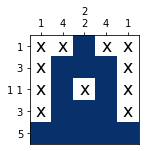

valid=True


In [462]:
for solution in solutions:
    board5x5s = Board(puzzle5x5s)
    plotter5x5s = BoardPlotter(board5x5s)

    # variables are not in lexical order anymore
    solution_sorted = sorted(solution.items())
    board5x5s.states.flat[:] = [v for k, v in solution_sorted]
    
    plotter5x5s.show()
    
    print(f"valid={board5x5s.is_done()}") 

In [ ]:
Now how can I place the chunks without prior knowledge of the board cells ?

TODO explain filler at least 1

In [463]:
problem = Problem()

In [464]:
problem.addVariable("r2s0", range(clues_rows[2][0], nc))
problem.addVariable("r2s0-1", range(1, nc))
problem.addVariable("r2s1", range(clues_rows[2][1], nc))

problem.addVariable("c2s0", range(clues_cols[2][0], nr))
problem.addVariable("c2s0-1", range(1, nc))
problem.addVariable("c2s1", range(clues_cols[2][1], nr))

In [465]:
problem.addConstraint(
                     ExactSumConstraint(nc),
                     ["r2s0", "r2s0-1", "r2s1"])

problem.addConstraint(
                     ExactSumConstraint(nr),
                     ["c2s0", "c2s0-1", "c2s1"])


In [466]:
solutions = problem.getSolutions()
solutions

[{'c2s0': 2, 'c2s1': 2, 'c2s0-1': 1, 'r2s0': 3, 'r2s0-1': 1, 'r2s1': 1},
 {'c2s0': 2, 'c2s1': 2, 'c2s0-1': 1, 'r2s0': 2, 'r2s0-1': 2, 'r2s1': 1},
 {'c2s0': 2, 'c2s1': 2, 'c2s0-1': 1, 'r2s0': 2, 'r2s0-1': 1, 'r2s1': 2},
 {'c2s0': 2, 'c2s1': 2, 'c2s0-1': 1, 'r2s0': 1, 'r2s0-1': 3, 'r2s1': 1},
 {'c2s0': 2, 'c2s1': 2, 'c2s0-1': 1, 'r2s0': 1, 'r2s0-1': 2, 'r2s1': 2},
 {'c2s0': 2, 'c2s1': 2, 'c2s0-1': 1, 'r2s0': 1, 'r2s0-1': 1, 'r2s1': 3}]

there may be many options to break the col c2 in 2 slices. Solving the board with extra constraints on slices will tel witch one is valid.

How to convert 'r2s0': 2, 'r2s0-1': 1, 'r2s1': 2 into ranges 0-2 and 3-5 ?
            
First slice is 0 to 'r2s0'

Second slice is 'r2s0-1' + 'r2s1' to number of columns
   
On large boards there may be more than slices (up to 7 in 15x15 is there are all 1). Let us solve this problem for the clue [3, 3, 1] on a 10x10 board.

In [468]:
# [3, 3, 1] -> oooxxoooxo
# 3 slices 0-1-2, 5-6-7, 9
solutions = [{'r0s0': 3, 'r0s0-1': 2, 'r0s1': 3, 'r0s1-2': 1, 'r0s2': 1}]

In [483]:
solution_sorted = sorted(solutions[0].items())
solution_sorted

[('r0s0', 3), ('r0s0-1', 2), ('r0s1', 3), ('r0s1-2', 1), ('r0s2', 1)]

In [485]:
slices = [v for (k,v) in solution_sorted]
slices

[3, 2, 3, 1, 1]

In [486]:
slices_cum = [sum(slices[0:i]) for i in range (len(slices))] + [10]
slices_cum

[0, 3, 5, 8, 9, 10]

In [487]:
[range(slices_cum[i],slices_cum[i+1]) for i in range(0, len(slices_cum), 2)]

[range(0, 3), range(5, 8), range(9, 10)]

In [494]:
def convert_to_ranges(solution, max):
    solution_sorted = sorted(solution.items())
    # get each slice of the soluton (dict values)
    slices = [v for (k,v) in solution_sorted]
    # accumulate slices to get start and end of ranges
    slices_cum = [sum(slices[0:i]) for i in range (len(slices))] + [max]
    ranges = [range(slices_cum[i],slices_cum[i+1]) for i in range(0, len(slices_cum), 2)]
    return ranges

In [496]:
solution = {'r0s0': 3, 'r0s0-1': 2, 'r0s1': 3, 'r0s1-2': 1, 'r0s2': 1}
convert_to_ranges(solution, 10)

[range(0, 3), range(5, 8), range(9, 10)]

In [497]:
solution = {'r0s0': 2, 'r0s0-1': 3, 'r0s1': 5}
convert_to_ranges(solution, 10)

[range(0, 2), range(5, 10)]

In [498]:
solution = {'r0s0': 10}
convert_to_ranges(solution, 10)

[range(0, 10)]

Now I can tranform the output of the slice problem into ranges for the board problem.

In [501]:
clues5x5s = {
    'rows': [1, 3, [1,1], 3, 5],
    'cols': [1, 4, [2,2], 4, 1]
}
puzzle5x5s = Puzzle(clues5x5s)

In [502]:
# get the clues
clues_rows = puzzle5x5s.norm_clues['rows']
clues_cols = puzzle5x5s.norm_clues['cols']
nc = puzzle5x5s.width
nr = puzzle5x5s.height

In [521]:
problem = Problem()

In [522]:
# all cells of a row add up to the clue for the row
# the clus is expressed as a list of one integer
for r in range(nr):
    ns = len(clues_rows[r])
    print(f"r={r} ns={ns}")
    if ns > 1:
        names = []
        name = f"r{r:02d}s0"
        print(f"name={name}")
        print(f"clues_rows[r][0]={clues_rows[r][0]}")
        problem.addVariable(name, range(clues_rows[r][0], nc+1))
        names.append(name)
        for s in range(1, ns):
            name = f"{name}-{s}"
            print(f"name={name}")
            problem.addVariable(name, range(1, nc))
            names.append(name)
            name = f"r{r:02d}s{s}"
            print(f"name={name}")
            print(f"clues_rows[r][{s}]={clues_rows[r][s]}")
            problem.addVariable(name, range(clues_rows[r][s], nc+1))
            names.append(name)

        # split blocks: all the cells of the row sum up to the sum of clues
        problem.addConstraint(
                     ExactSumConstraint(nc),
                     names)
    else:
        name = f"r{r:02d}s0"
        print(f"name={name}")
        print(f"clues_rows[r][0]={clues_rows[r][0]}")
        problem.addVariable(name, range(clues_rows[r][0], nc+1))
        problem.addConstraint(
                     ExactSumConstraint(nc),
                     [name])
    

r=0 ns=1
name=r00s0
clues_rows[r][0]=1
r=1 ns=1
name=r01s0
clues_rows[r][0]=3
r=2 ns=2
name=r02s0
clues_rows[r][0]=1
name=r02s0-1
name=r02s1
clues_rows[r][1]=1
r=3 ns=1
name=r03s0
clues_rows[r][0]=3
r=4 ns=1
name=r04s0
clues_rows[r][0]=5


In [523]:
# all cells of a col add up to the clue for the col
# the clus is expressed as a list of one integer
for c in range(nc):
    ns = len(clues_cols[c])
    if ns > 1:
        names = []
        name = f"c{c:02d}s0"
        problem.addVariable(name, range(clues_cols[c][0], nr+1))
        names.append(name)
        for s in range(1, ns):
            name = f"{name}-{s}"
            problem.addVariable(name, range(1, nr))
            names.append(name)
            name = f"c{c:02d}s{s}"
            problem.addVariable(name, range(clues_cols[c][s], nr+1))
            names.append(name)

        # split blocks: all the cells of the col sum up to the sum of clues
        problem.addConstraint(
                     ExactSumConstraint(nr),
                     names)
    else:
        name = f"c{c:02d}s0"
        problem.addVariable(name, range(clues_cols[c][0], nr+1))
        problem.addConstraint(
                     ExactSumConstraint(nr),
                     [name])
    

In [524]:
solutions = problem.getSolutions()
solutions

[{'c02s0': 2,
  'c02s1': 2,
  'c02s0-1': 1,
  'r02s0-1': 3,
  'r02s0': 1,
  'r02s1': 1,
  'c00s0': 5,
  'c01s0': 5,
  'c03s0': 5,
  'c04s0': 5,
  'r00s0': 5,
  'r01s0': 5,
  'r03s0': 5,
  'r04s0': 5},
 {'c02s0': 2,
  'c02s1': 2,
  'c02s0-1': 1,
  'r02s0-1': 2,
  'r02s0': 2,
  'r02s1': 1,
  'c00s0': 5,
  'c01s0': 5,
  'c03s0': 5,
  'c04s0': 5,
  'r00s0': 5,
  'r01s0': 5,
  'r03s0': 5,
  'r04s0': 5},
 {'c02s0': 2,
  'c02s1': 2,
  'c02s0-1': 1,
  'r02s0-1': 2,
  'r02s0': 1,
  'r02s1': 2,
  'c00s0': 5,
  'c01s0': 5,
  'c03s0': 5,
  'c04s0': 5,
  'r00s0': 5,
  'r01s0': 5,
  'r03s0': 5,
  'r04s0': 5},
 {'c02s0': 2,
  'c02s1': 2,
  'c02s0-1': 1,
  'r02s0-1': 1,
  'r02s0': 3,
  'r02s1': 1,
  'c00s0': 5,
  'c01s0': 5,
  'c03s0': 5,
  'c04s0': 5,
  'r00s0': 5,
  'r01s0': 5,
  'r03s0': 5,
  'r04s0': 5},
 {'c02s0': 2,
  'c02s1': 2,
  'c02s0-1': 1,
  'r02s0-1': 1,
  'r02s0': 2,
  'r02s1': 2,
  'c00s0': 5,
  'c01s0': 5,
  'c03s0': 5,
  'c04s0': 5,
  'r00s0': 5,
  'r01s0': 5,
  'r03s0': 5,
  'r04s0':

# TODO convert to range